In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

2023-12-21 18:31:36.944807: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-21 18:31:36.944864: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-21 18:31:36.945643: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-21 18:31:36.951480: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-21 18:31:37.544499: W tensorflow/compiler/tf2

In [2]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Increased rotation range
    width_shift_range=0.3,  # Increased width shift range
    height_shift_range=0.3,  # Increased height shift range
    shear_range=0.3,  # Increased shear range
    zoom_range=0.3,  # Increased zoom range
    brightness_range=[0.5, 1.5],  # Added brightness adjustment
    horizontal_flip=True,
    fill_mode='constant'  # Experiment with different fill modes
)

In [3]:
image_width = 128
image_height = 128
batch_size = 200
num_epochs = 10

In [4]:
train_generator = datagen.flow_from_directory(
    'dataset',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 27167 images belonging to 2 classes.


In [5]:
test_generator = datagen.flow_from_directory(
    'tests',
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.


In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

2023-12-21 18:31:39.003976: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-21 18:31:39.025564: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-21 18:31:39.025626: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-21 18:31:39.027777: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:07:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-21 18:31:39.027809: I external/local_xla/xla/stream_executor

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['accuracy'])

In [8]:
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=test_generator
)

Epoch 1/10


2023-12-21 18:31:43.523886: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-21 18:31:44.845707: I external/local_xla/xla/service/service.cc:168] XLA service 0x55ba775ae3a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-21 18:31:44.845740: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-21 18:31:44.850665: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1703179904.925405    1835 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


136/136 [==============================] - 261s 2s/step - loss: 0.2338 - accuracy: 0.6424 - val_loss: 0.2556 - val_accuracy: 0.5600
Epoch 2/10
136/136 [==============================] - 126s 928ms/step - loss: 0.2082 - accuracy: 0.6761 - val_loss: 0.2920 - val_accuracy: 0.5200
Epoch 3/10
136/136 [==============================] - 128s 941ms/step - loss: 0.1997 - accuracy: 0.6923 - val_loss: 0.2592 - val_accuracy: 0.5500
Epoch 4/10
136/136 [==============================] - 127s 933ms/step - loss: 0.1938 - accuracy: 0.7030 - val_loss: 0.2506 - val_accuracy: 0.5500
Epoch 5/10
136/136 [==============================] - 130s 952ms/step - loss: 0.1891 - accuracy: 0.7140 - val_loss: 0.2676 - val_accuracy: 0.5700
Epoch 6/10
136/136 [==============================] - 127s 931ms/step - loss: 0.1886 - accuracy: 0.7129 - val_loss: 0.2857 - val_accuracy: 0.5000
Epoch 7/10
136/136 [==============================] - 127s 932ms/step - loss: 0.1842 - accuracy: 0.7205 - val_loss: 0.2692 - val_accuracy:

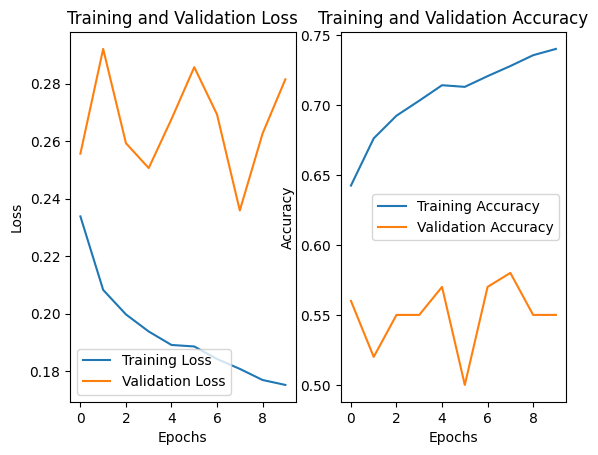

In [9]:
# Plot training and validation loss

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Include 'accuracy'
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Include 'accuracy'
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [10]:
loss = model.evaluate(test_generator)

model.save('quota_model.keras')

1/1 [==============================] - 1s 562ms/step - loss: 0.2849 - accuracy: 0.5400


In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [12]:
model = tf.keras.models.load_model('quota_model.keras')

In [16]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(image_width, image_height))  # Adjust target size based on your model architecture
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Function to predict gender
def predict_gender(img_path):
    processed_image = preprocess_image(img_path)
    prediction = model.predict(processed_image)
    if prediction[0][0] > 0.5:
        return "Woman"
    else:
        return "Man"

In [18]:
import os

In [19]:
for img in os.listdir("target"):
    print("{}: {}".format(img, predict_gender(f"target/{img}")))

1/1 [==============================] - 0s 12ms/step
bp.jpg: Man
1/1 [==============================] - 0s 12ms/step
img.jpg: Man
1/1 [==============================] - 0s 11ms/step
sj.jpg: Woman
